# sage-flatsurf (SageDays 74)

<b>Speaker:</b> <a href="http://wphooper.com">Pat Hooper</a> (City College of New York and CUNY Graduate Center)

<b>Date:</b> June 2nd, 2016. (This file was last updated on June 10, 2016.)

Sage-flatsurf is a program to explore "flat surfaces" by Vincent Delecroix and Pat Hooper.

It is available as a sage package at <a href="https://github.com/videlec/sage-flatsurf">https://github.com/videlec/sage-flatsurf</a>.

## Polygonal Billiards:

In [1]:
from flatsurf import *
from flatsurf.geometry.surface import Surface_list

The following builds a right triangle with one angle of pi/8 with a shorter leg of height 1. 

Polygon: (0, 0), (a + 1, 0), (a + 1, 1)


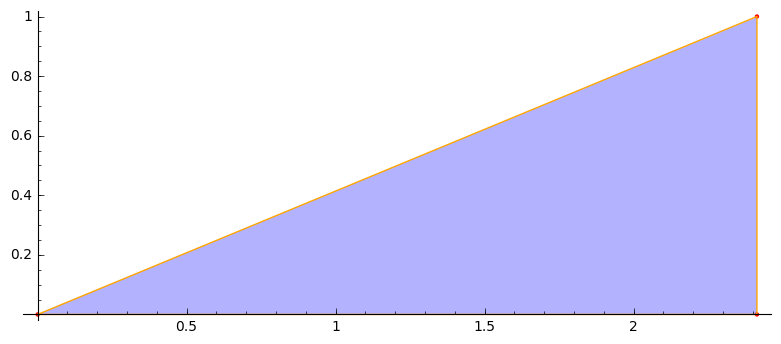

In [2]:
p = polygons.right_triangle(1/8,leg1=1)
print(p)
p.plot()

We use SAGE to represent the polygons so that the vertices have coordinates in a number field.

In [3]:
field = p.base_ring()
print(field)
a=field.gen()
print(str(a)+"="+str(a.n()))
print("p="+str(p))

Number Field in a with defining polynomial y^2 - 2
a=1.41421356237309
p=Polygon: (0, 0), (a + 1, 0), (a + 1, 1)


We can make the polygon into a billiard table:

In [4]:
s = similarity_surfaces.billiard(p)

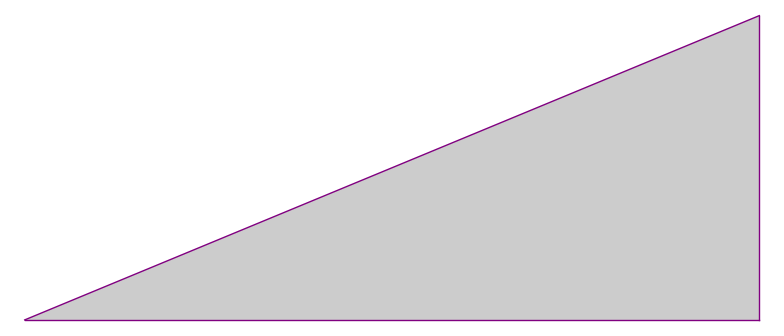

In [5]:
s.plot()

In [6]:
v = s.tangent_vector(0,(3/4,0),(1,a))
print(v)

SimilaritySurfaceTangentVector in polygon 0 based at (3/4, 0) with vector (1, a)


In [7]:
traj = v.straight_line_trajectory()

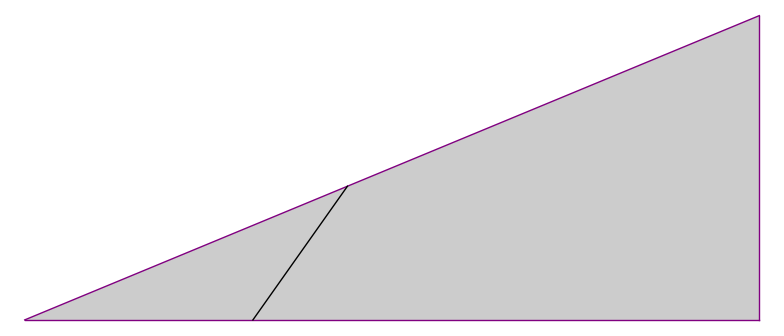

In [8]:
s.plot()+traj.plot()

In [9]:
traj.flow(1)

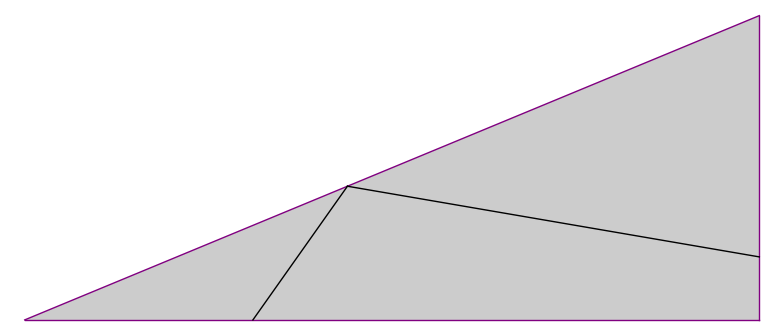

In [10]:
s.plot()+traj.plot()

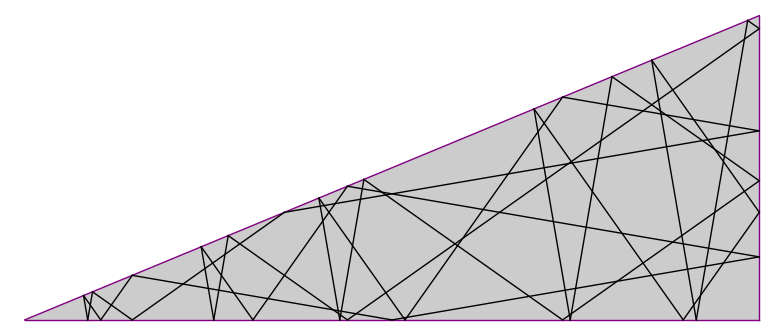

In [11]:
traj.flow(100)
s.plot()+traj.plot()

In [12]:
traj.is_closed()

True

In [13]:
v = s.tangent_vector(0,(3/4,0),(3+a,1+a))
print(v)
traj = v.straight_line_trajectory()
traj.flow(1000)

SimilaritySurfaceTangentVector in polygon 0 based at (3/4, 0) with vector (a + 3, a + 1)


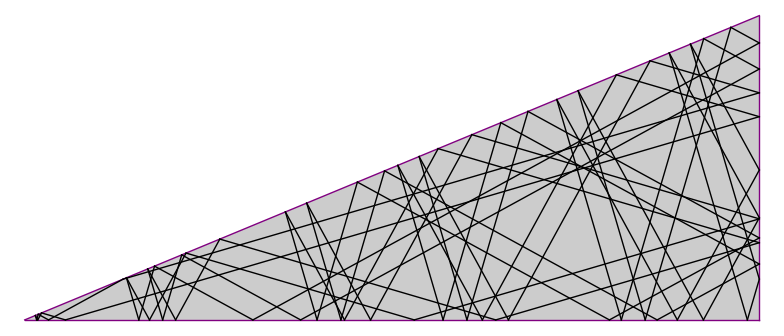

In [14]:
s.plot()+traj.plot()

In [15]:
traj.is_closed()

True

In [16]:
v = s.tangent_vector(0,(3/4,0),(12451,13255))
traj = v.straight_line_trajectory()
traj.flow(600)

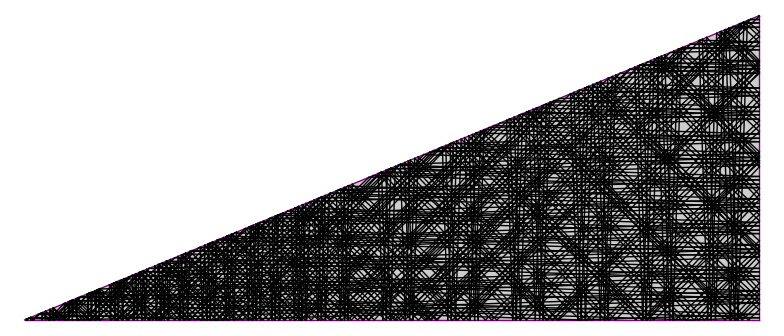

In [17]:
s.plot()+traj.plot()

In [18]:
traj.is_closed()

False

## Cone Surfaces
Secretly, the billiard table is actually a cone surface; the double of a triangle across its boundary.

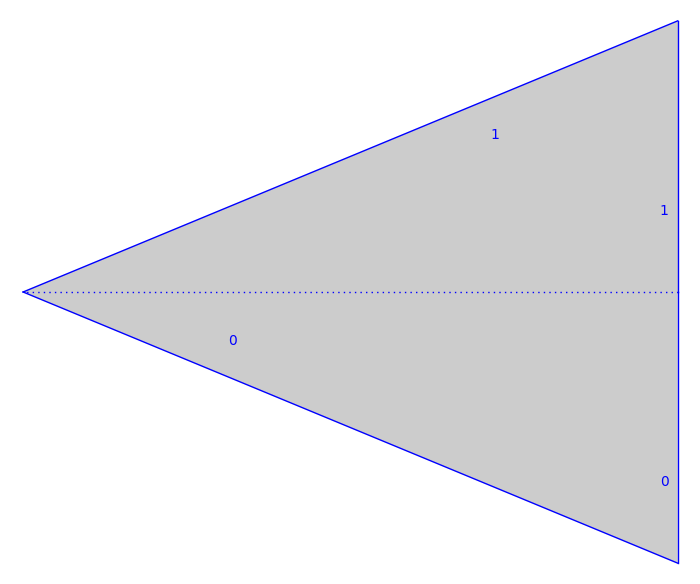

In [19]:
s.graphical_surface().make_adjacent(0,0)
s.plot()

In [20]:
v = s.tangent_vector(0,(3/4,0),(3+a,1+a))
print(v)
traj = v.straight_line_trajectory()
traj.flow(1000)

SimilaritySurfaceTangentVector in polygon 0 based at (3/4, 0) with vector (a + 3, a + 1)


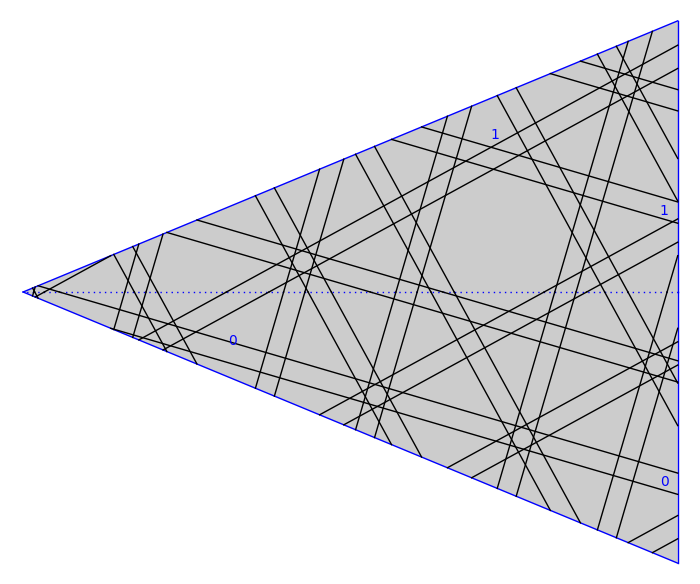

In [21]:
s.plot()+traj.plot()

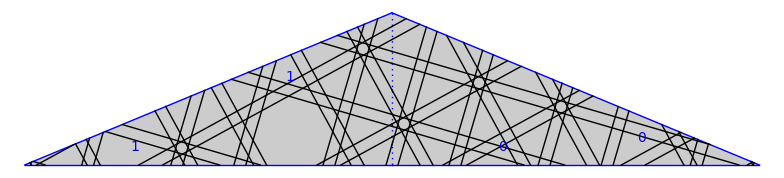

In [22]:
s.graphical_surface().make_adjacent(0,1)
s.plot()+traj.plot()

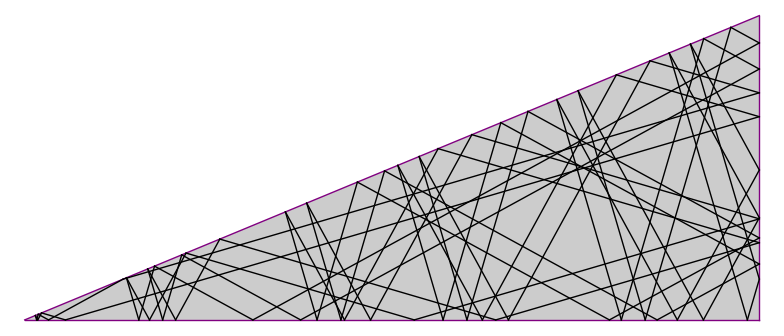

In [23]:
s.graphical_surface().make_adjacent(0,1,reverse=True)
s.plot()+traj.plot()

## Translation Surfaces:

In [24]:
ts=s.minimal_translation_cover()
ts=ts.copy(relabel=True)
print(ts)

TranslationSurface built from 16 polygons


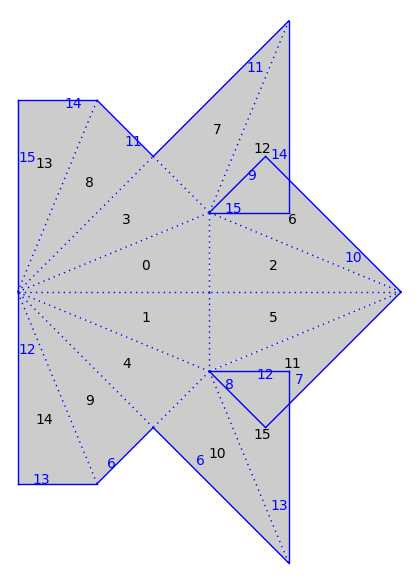

In [25]:
ts.plot()

In [26]:
adjacencies=[(13,2),(15,2),(10,2),(6,2),(2,2),(5,2),(11,2),(7,2)]
for adjacency in adjacencies:
    ts.graphical_surface().make_adjacent(*adjacency)

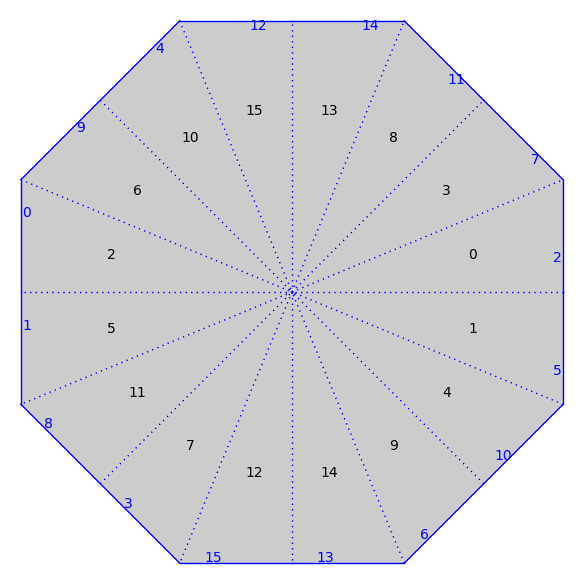

In [27]:
ts.plot()

In [28]:
v = ts.tangent_vector(0,(3/4,0),(3+a,1+a))
traj = v.straight_line_trajectory()
traj.flow(1000)
print(traj.is_closed())

True


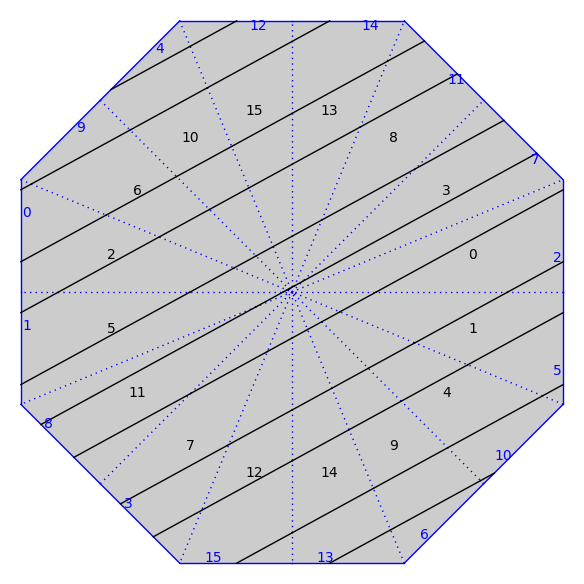

In [29]:
ts.plot()+traj.plot()

a=a=1.41421356237309


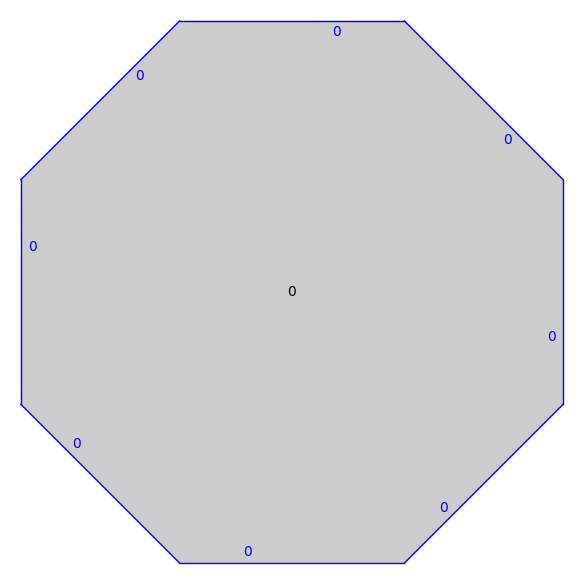

In [30]:
ts = translation_surfaces.regular_octagon()
a=ts.base_ring().gens()[0]
print("a="+str(a)+"="+str(a.n()))
ts.plot()

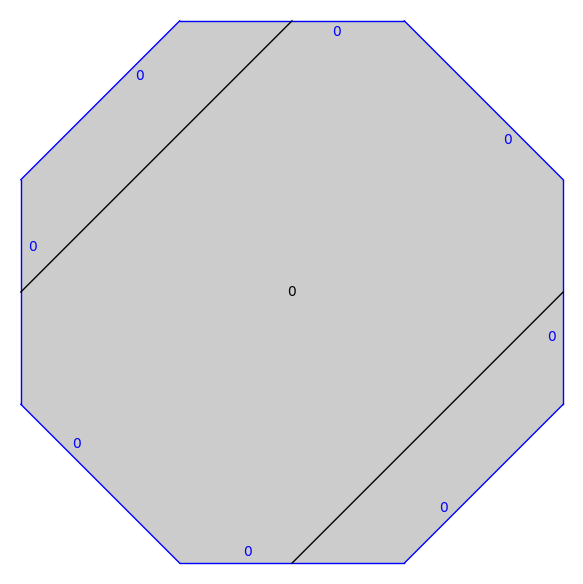

In [31]:
v = ts.tangent_vector(0,(1/2,0),(1,1))
traj = v.straight_line_trajectory()
traj.flow(1000)
ts.plot()+traj.plot()

In [32]:
m = matrix([[1,1],[0,1]])
ts2 = m*ts

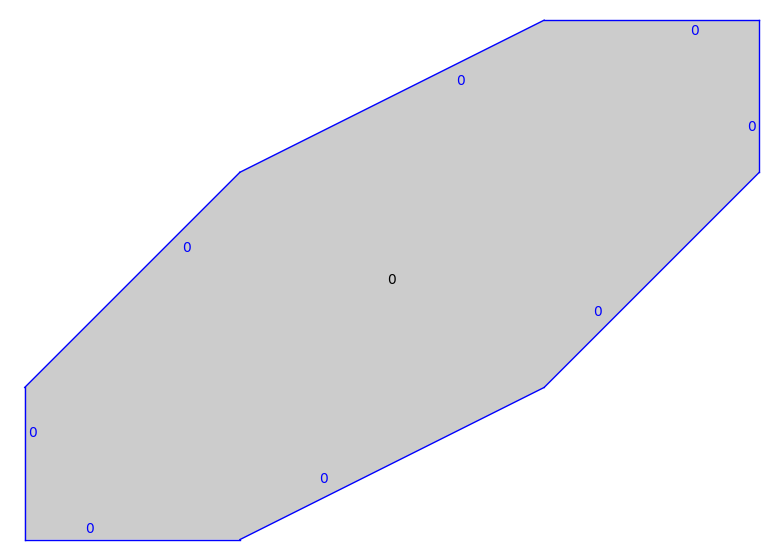

In [33]:
ts2.plot()

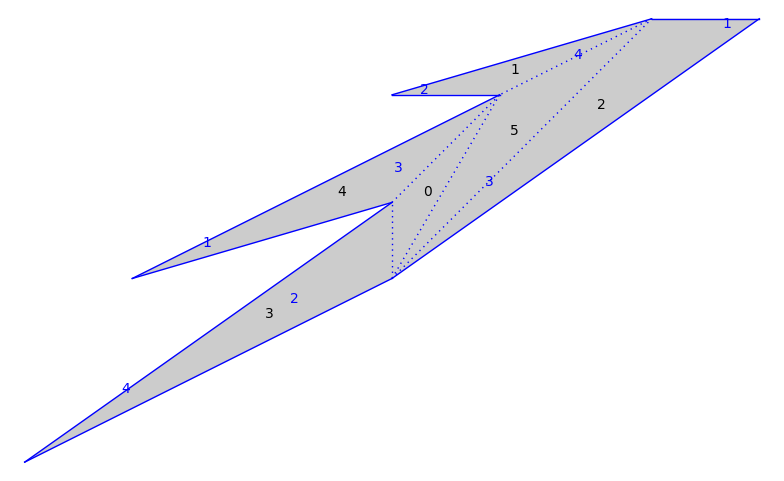

In [34]:
ts2=ts2.triangulate().copy(relabel=True)
ts2.plot()

In [35]:
ts2.polygon(5)

Polygon: (0, 0), (-1, -1/2*a - 1), (a, 1/2*a)

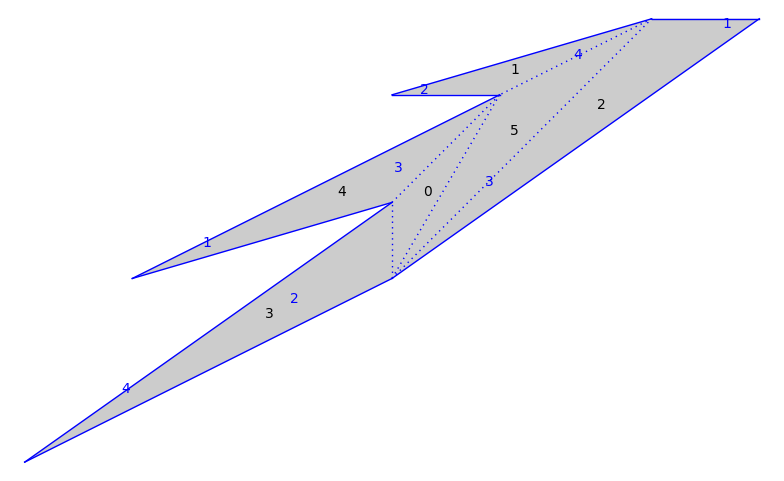

In [36]:
ts2.graphical_surface().make_adjacent(5,1)
ts2.plot()

In [37]:
ts2=ts2.triangle_flip(5,1)
ts2.graphical_surface().make_adjacent(1,0)

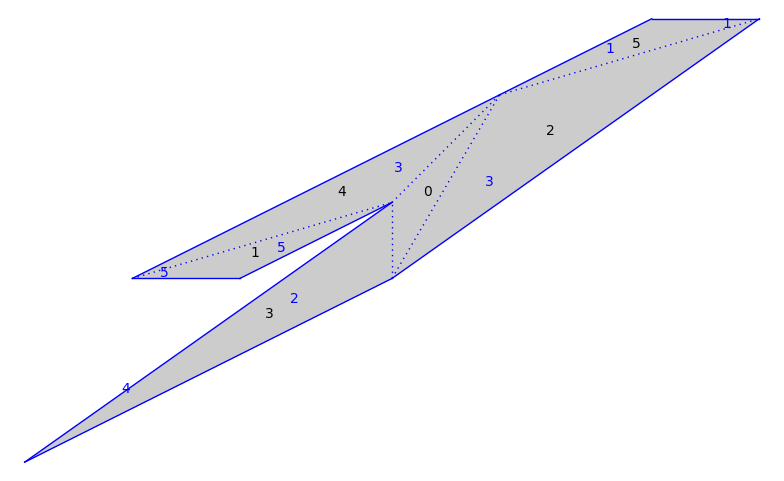

In [38]:
ts2.plot()

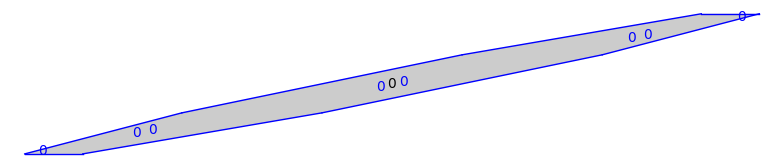

In [39]:
m = matrix([[1,2+2*a],[0,1]])
ts2 = m*ts
ts2.plot()

In [40]:
ts2=ts2.triangulate().copy(relabel=True, mutable=True)

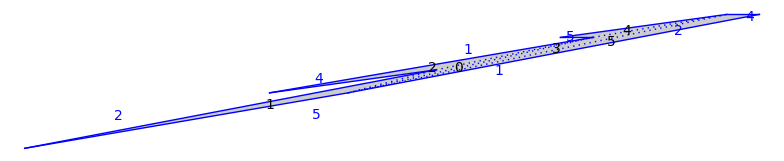

In [41]:
ts2.plot()

True


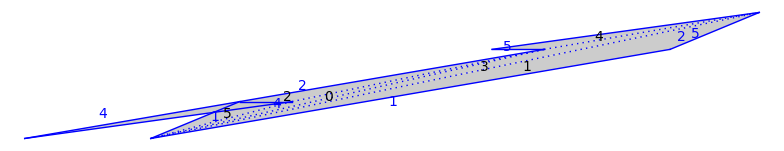

In [42]:
print(ts2.delaunay_single_flip())
ts2.plot(cached=False)

False


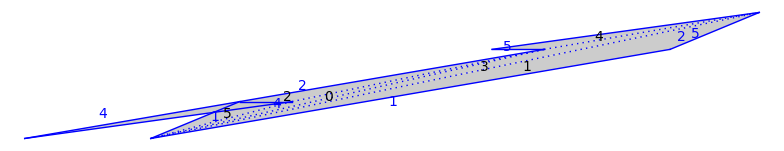

In [43]:
print(ts2.delaunay_single_join())
ts2.plot(cached=False)

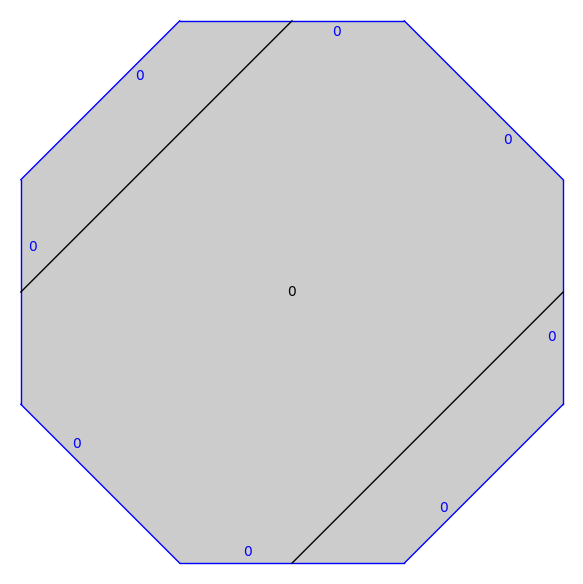

In [44]:
v=ts.tangent_vector(0,(1/2,0),(1,1))
traj=v.straight_line_trajectory()
traj.flow(10)
ts.plot()+traj.plot()

In [45]:
from flatsurf.geometry.half_dilation_surface import GL2RMapping

In [46]:
m

[      1 2*a + 2]
[      0       1]

In [47]:
map1=GL2RMapping(ts,m)

In [48]:
ts2=map1.codomain()

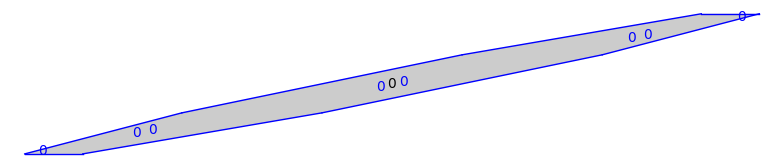

In [49]:
ts2.plot()

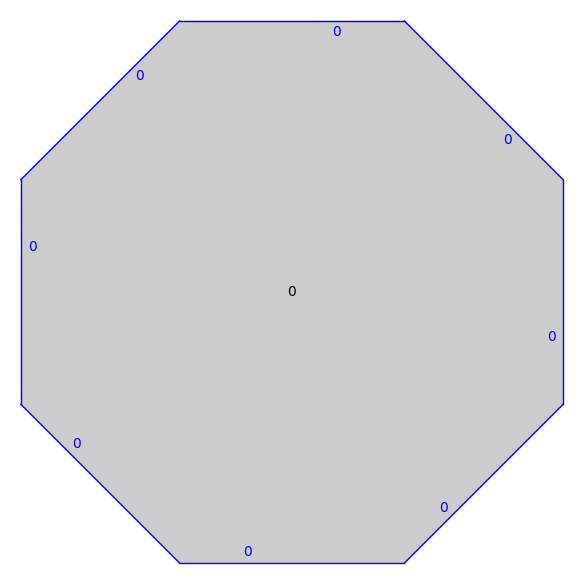

In [50]:
map2=ts2.canonicalize_mapping()
map2.codomain().plot()

In [51]:
Map = map2*map1

In [52]:
w=Map.push_vector_forward(v)

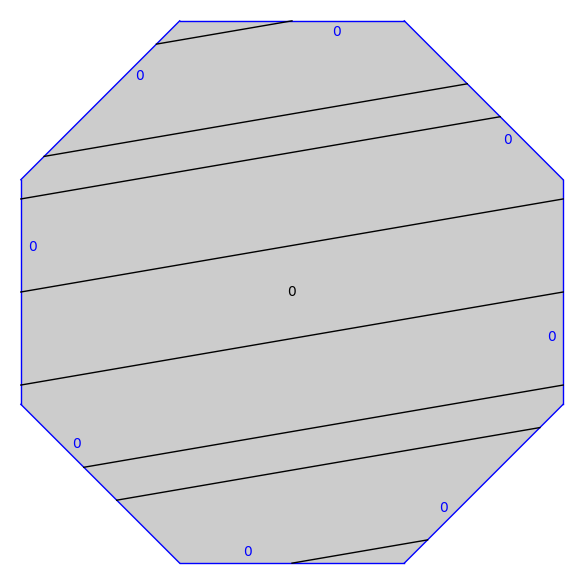

In [53]:
traj2=w.straight_line_trajectory()
traj2.flow(100)
Map.codomain().plot()+traj2.plot()

In [54]:
traj2.segments()[0]

Segment in polygon 0 starting at (1/2, 0) and ending at (1/4*a + 3/4, 1/4*a - 1/4)

## Infinite surfaces

We build the billiard table for the 3-4-5 right triangle.

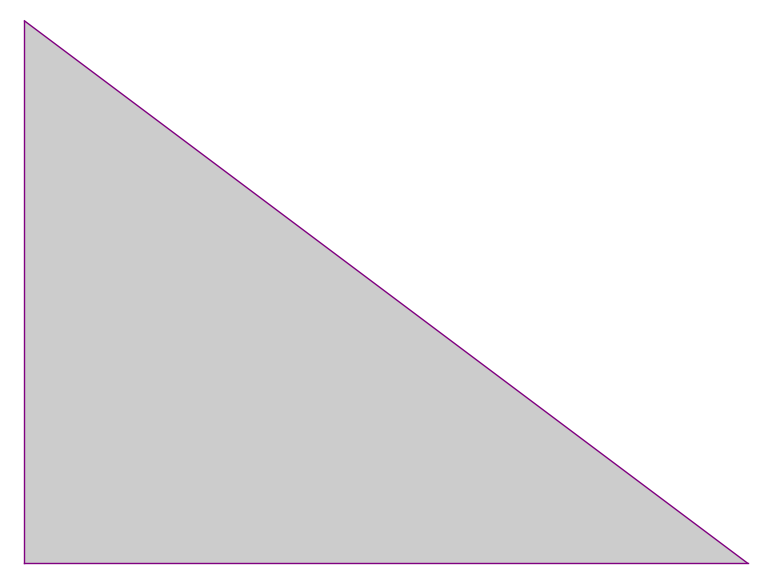

In [55]:
from flatsurf import *
p = polygons(vertices=[(0,0),(4,0),(0,3)])
s = similarity_surfaces.billiard(p)
s.plot()

In [56]:
ts=s.minimal_translation_cover()
ts=ts.copy(relabel=True)

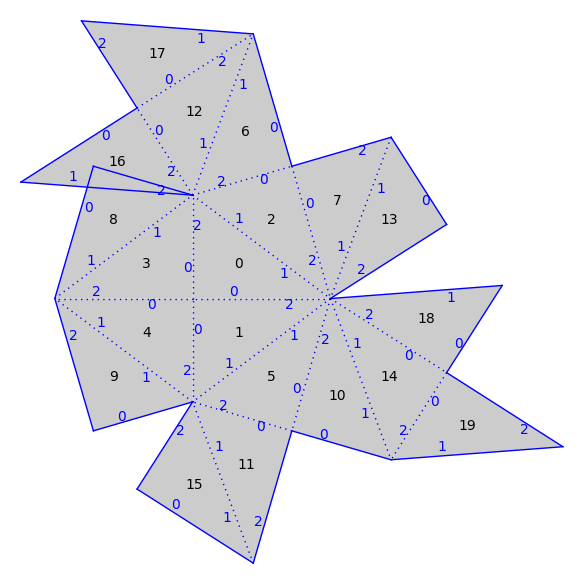

In [57]:
gs = ts.graphical_surface(polygon_labels=False)
gs.make_all_visible(limit=19)
gs.process_options(polygon_labels=True, edge_labels="number")
gs.plot()

In [58]:
gs=ts.graphical_surface()

In [59]:
gs.make_adjacent_and_visible(18,0)
gs.make_adjacent_and_visible(10,0)
gs.make_adjacent_and_visible(6,0)
gs.make_adjacent_and_visible(16,0)
gs.process_options(polygon_labels=True, edge_labels="gluings")

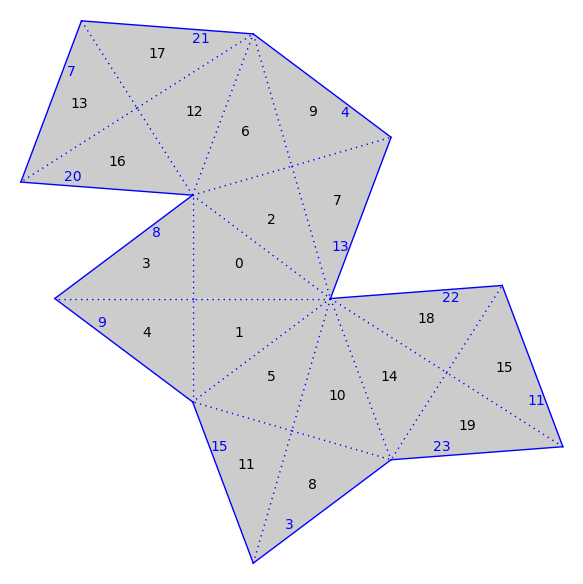

In [60]:
ts.plot()

In [61]:
v=ts.tangent_vector(0,(1/25,0),(0,1))
traj=v.straight_line_trajectory()

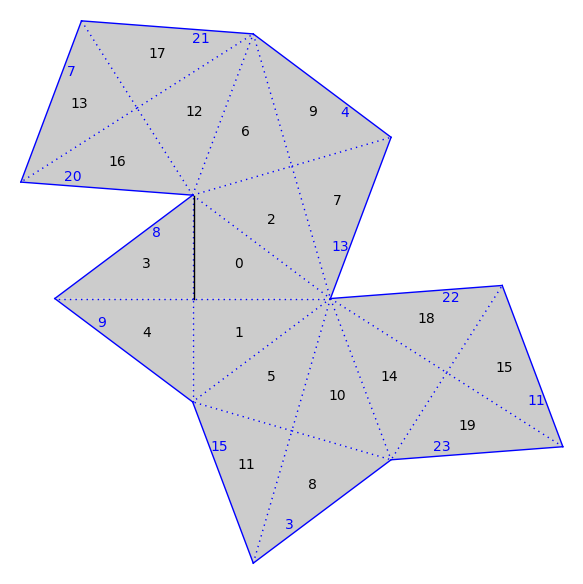

In [62]:
gs.plot()+traj.plot()

True


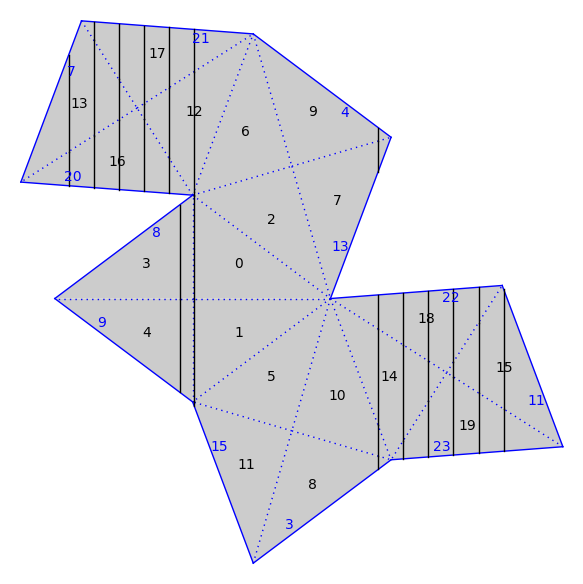

In [63]:
traj.flow(1000)
print(traj.is_closed())
gs.plot()+traj.plot()

In [64]:
gs.process_options(polygon_labels=True, edge_labels="number")

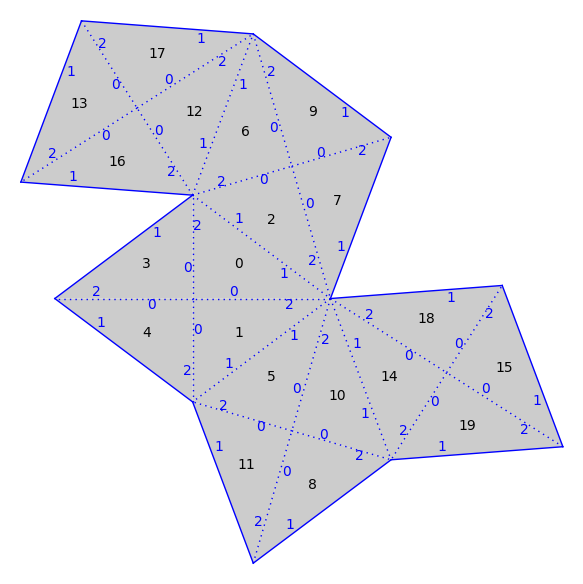

In [65]:
gs.plot()